Epoch 1/100


C:\Users\itsri\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4115 - loss: 0.8860 - val_accuracy: 0.7391 - val_loss: 0.5724
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7579 - loss: 0.5354 - val_accuracy: 0.7902 - val_loss: 0.5027
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7920 - loss: 0.4929 - val_accuracy: 0.7967 - val_loss: 0.4858
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8033 - loss: 0.4615 - val_accuracy: 0.8001 - val_loss: 0.4743
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7991 - loss: 0.4676 - val_accuracy: 0.8016 - val_loss: 0.4651
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8071 - loss: 0.4520 - val_accuracy: 0.8031 - val_loss: 0.4577
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8151 - loss: 0.4355 - val_accuracy: 0.8092 - val_loss: 0.4512
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8153 - loss: 0.4420 - val_accuracy: 0.8122

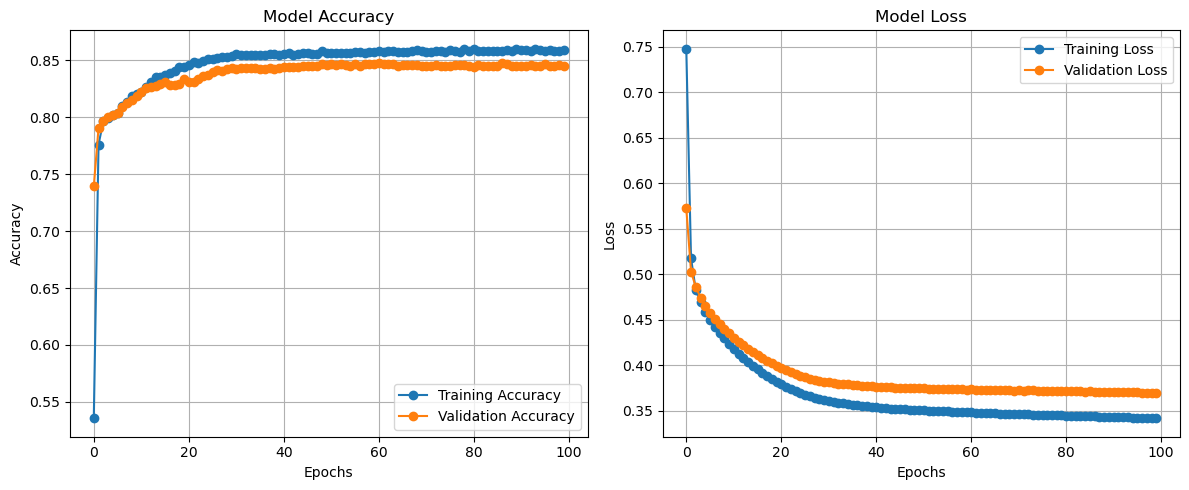

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


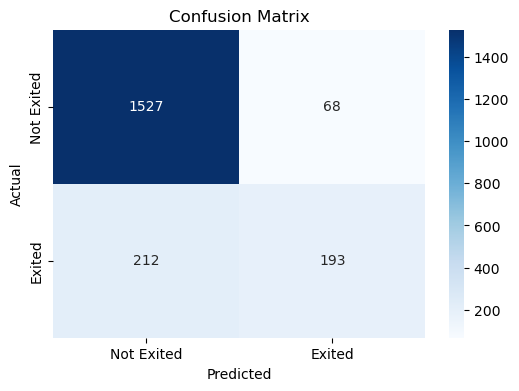

Model Accuracy: 0.86


In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

# Create dummy variables
geography = pd.get_dummies(X["Geography"], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

# Concatenate the Data Frames
X = pd.concat([X, geography, gender], axis=1)

# Drop Unnecessary columns
X = X.drop(['Geography', 'Gender'], axis=1)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Importing the TensorFlow/Keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Initializing the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

# Summarizing accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'], label='Training Loss', marker='o')
plt.plot(model_history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Making predictions
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Confusion Matrix and Accuracy
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Print accuracy
print(f"Model Accuracy: {accuracy:.2f}")
